In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
df = pd.read_csv('data/Iris.csv')

print(df.shape)

df.head()

(150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [4]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [5]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [8]:
df.groupby('variety').agg({'sepal.width': 'count'})

,sepal.width
variety,
Setosa,50
Versicolor,50
Virginica,50


In [9]:
df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [10]:
df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [11]:
df['variety'].nunique()

3

In [12]:
# Select Rows by Position:
df.iloc[0:5]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
# Select Rows by Label:
df.loc[0:5]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa


In [14]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [15]:
df.duplicated().sum()

1

In [16]:
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

C:\Users\srini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

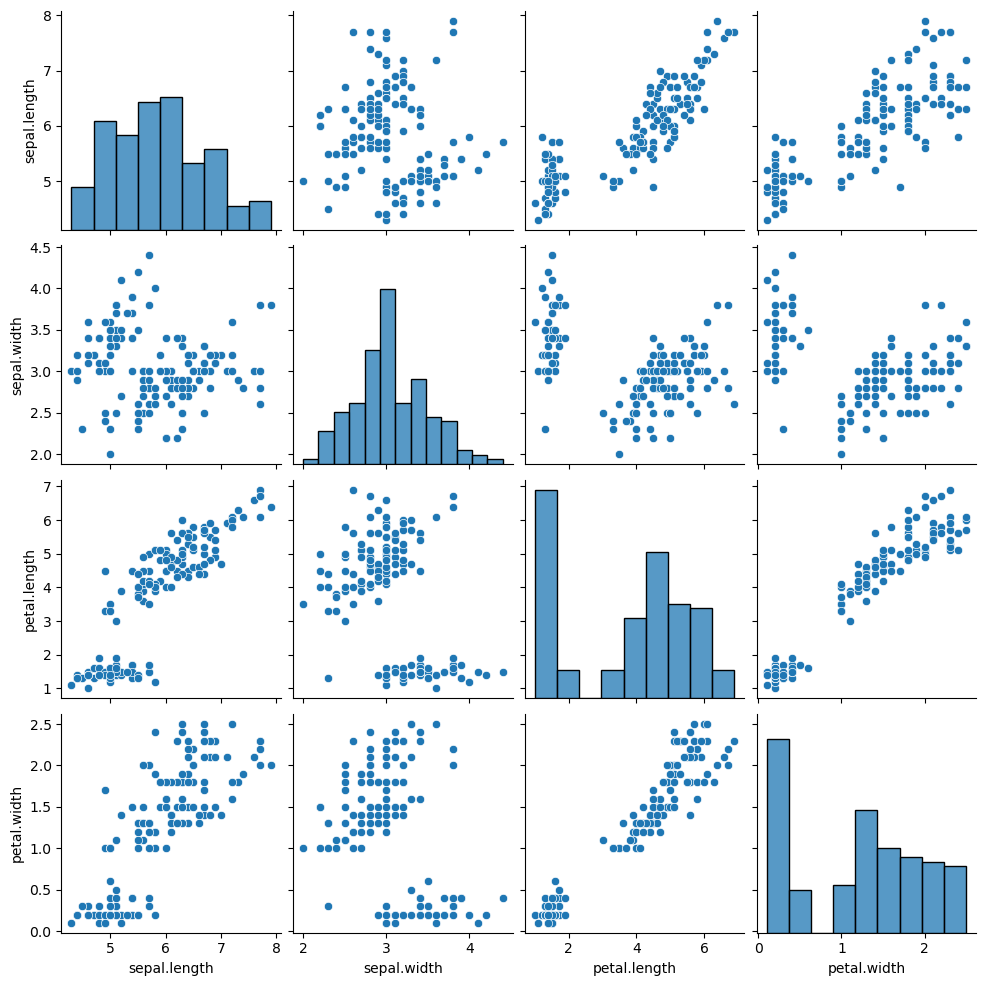

In [18]:
import seaborn as sns

sns.pairplot(df)

              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.118129      0.873738     0.820620
sepal.width      -0.118129     1.000000     -0.426028    -0.362894
petal.length      0.873738    -0.426028      1.000000     0.962772
petal.width       0.820620    -0.362894      0.962772     1.000000


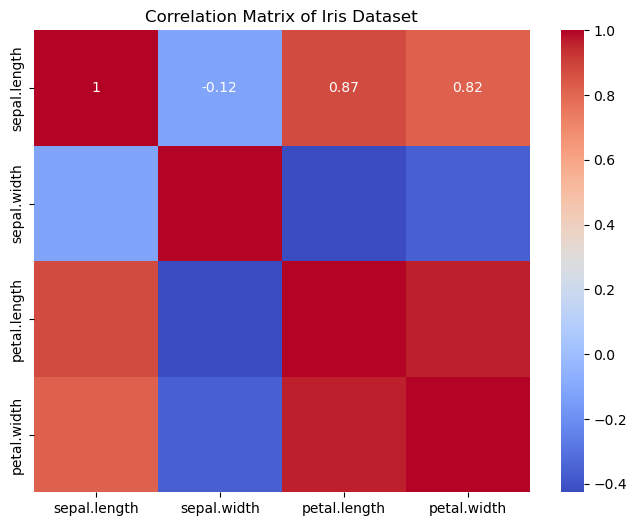

In [19]:
# Drop the non-numeric column 'species'
iris_numeric = df.drop(columns=['variety'])

# Check for correlation between numeric columns
correlation_matrix = iris_numeric.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Iris Dataset")
plt.show()

In [20]:
import pandas as pd

def remove_correlated_features(df, threshold=0.9, delete=True):
    
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    # Compute the correlation matrix for numeric columns
    corr_matrix = numeric_df.corr().abs()  # Use absolute correlation values
    
    # Create a boolean matrix for the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index pairs of highly correlated columns
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    correlated_pairs = [(column, row) for column in upper.columns for row in upper.index if upper.at[row, column] > threshold]

    if delete:
        # Drop the correlated columns
        df = df.drop(columns=to_drop)
        return df
    else:
        # Return the list of highly correlated columns
        return correlated_pairs


In [21]:
df = remove_correlated_features(df, threshold=0.9, delete=True)

In [22]:
df

,sepal.length,sepal.width,petal.length,variety
0,5.1,3.5,1.4,Setosa
1,4.9,3.0,1.4,Setosa
2,4.7,3.2,1.3,Setosa
3,4.6,3.1,1.5,Setosa
4,5.0,3.6,1.4,Setosa
...,...,...,...,...
145,6.7,3.0,5.2,Virginica
146,6.3,2.5,5.0,Virginica
147,6.5,3.0,5.2,Virginica
148,6.2,3.4,5.4,Virginica


In [23]:
import pandas as pd

def categorize_columns_by_type(df, *types):
    """
    Categorizes columns in a DataFrame based on specified data types and assigns them to variables.
    Also returns a dictionary of these variables containing lists of column names.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        *types (str): Data types to include in the output. Example types: 'float', 'int', 'object', 'category', etc.
    
    Returns:
        dict: A dictionary with data types as keys and lists of column names for each type.
        Variables: Dynamically assigned lists of column names based on data types.
    """
    # Initialize a dictionary to store variables for each data type
    result = {}
    
    # Loop through the specified types and categorize the columns accordingly
    for dtype in types:
        columns = df.select_dtypes(include=[dtype]).columns.tolist()
        
        # Dynamically assign to a variable based on the data type (e.g., float_columns)
        var_name = f"{dtype}_columns"
        result[var_name] = columns
        
        # Print the result for each data type with variable-style output
        print(f"{var_name} = {columns}")

    # Return the dictionary containing the assigned variables
    return result

In [24]:
# # Example: Get columns of type 'float', 'int', 'object', and 'datetime'
# categorized_columns = categorize_columns_by_type(df, 'float', 'int', 'object', 'datetime')

# # Access the results
# float_columns = categorized_columns['float_columns']
# int_columns = categorized_columns['int_columns']
# object_columns = categorized_columns['object_columns']
# datetime_columns = categorized_columns['datetime_columns']

In [25]:
import pandas as pd

def categorize_columns(df):
    """
    Automatically categorizes columns in a DataFrame based on their data types and assigns them to variables.
    Returns a dictionary of the column names categorized by data types available in the DataFrame.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame.
    
    Returns:
        dict: A dictionary with data types as keys and lists of column names for each type.
        Variables: Dynamically assigned lists of column names based on detected data types.
    Get Columns:
    float_vars  = categorized_columns.get('float_columns') 
    int_columns = categorized_columns['int_columns']        
    """
    # Define the available data types we want to categorize
    dtypes_to_check = ['float', 'int', 'uint', 'object', 'category', 'bool', 'datetime', 'timedelta', 'complex']
    
    # Initialize a dictionary to store variables for each data type
    result = {}
    
    # Loop through the data types and categorize the columns accordingly
    for dtype in dtypes_to_check:
        columns = df.select_dtypes(include=[dtype]).columns.tolist()
        
        # Only assign and print if columns of this type exist in the DataFrame
        if columns:
            var_name = f"{dtype}_columns"
            result[var_name] = columns
            
            # Print the result for each data type with variable-style output
            print(f"{var_name} = {columns}")
    
    # Return the dictionary containing the assigned variables
    return result

In [26]:
# Call the function
categorized_columns = categorize_columns(df)

float_columns = ['sepal.length', 'sepal.width', 'petal.length']
object_columns = ['variety']


In [27]:
float_vars  = categorized_columns.get('float_columns')

In [28]:
float_columns

NameError: name 'float_columns' is not defined

In [ ]:
# object_columns 

In [ ]:
# df[float_columns].head()

In [ ]:
# df[object_columns].head()

In [ ]:

import pandas as pd

def categorize_columns(df):
    """
    Automatically categorizes columns in a DataFrame based on their data types and assigns them to variables.
    Returns a dictionary of the column names categorized by data types available in the DataFrame.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame.
    
    Returns:
        dict: A dictionary with data types as keys and lists of column names for each type.
        Variables: Dynamically assigned lists of column names based on detected data types.
    """
    # Define the available data types we want to categorize
    dtypes_to_check = ['float', 'int', 'uint', 'object', 'category', 'bool', 'datetime', 'timedelta', 'complex']
    
    # Initialize a dictionary to store variables for each data type
    result = {}
    
    # Loop through the data types and categorize the columns accordingly
    for dtype in dtypes_to_check:
        columns = df.select_dtypes(include=[dtype]).columns.tolist()
        
        # Only assign and print if columns of this type exist in the DataFrame
        if columns:
            var_name = f"{dtype}_columns"
            result[var_name] = columns

    # Calculate the maximum length of the variable names for alignment
    max_len = max(len(var_name) for var_name in result.keys())
    
    # Print the result for each data type with aligned output
    for var_name, columns in result.items():
        print(f"{var_name.ljust(max_len)} = {columns}")
    
    # Return the dictionary containing the assigned variables
    return result

In [ ]:
# Call the function
categorized_columns = categorize_columns(df)

In [ ]:
float_columns

In [ ]:
object_columns 

In [ ]:
df[float_columns].corr()